## Data Cleaning

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv(r'C:\Users\44771\OneDrive\Desktop\Time Series Project\perrin-freres-monthly-champagne-.csv')

In [4]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
df.columns = ['Month', 'Sales']
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
df.shape

(107, 2)

In [7]:
df.isnull().sum()

Month    1
Sales    2
dtype: int64

In [8]:
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [9]:
df.drop(106, axis = 0, inplace = True)

In [10]:
df.drop(105, axis = 0, inplace = True)

In [11]:
df.shape

(105, 2)

In [12]:
df.dtypes

Month     object
Sales    float64
dtype: object

In [13]:
df['Month'] = pd.to_datetime(df['Month'])

In [14]:
df.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [15]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [ ]:
## ML - Numbers
## Times series - Month 

In [16]:
df.set_index('Month', inplace = True)

In [17]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [18]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Problem statement.
### 1. Visualising data in the sales column. 
### 2. Checking the stationary trend in the data.

<AxesSubplot:xlabel='Month'>

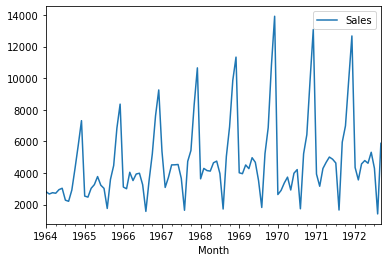

In [19]:
df.plot()

In [ ]:
## Seasonal data. 
## Christmas - Sales up in the month of christmas. 
## Stationarity is not in the data as it is seasonal. 

In [ ]:
## statistical test to check the stationarity. 
## ->agumenteddfuller test, P-values < 0.05

In [20]:
!pip install statsmodels

In [21]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
## Hypothesis testing
## 1. Ho- data is no stationary
## 2. H1- data is stationary.

In [22]:
adfuller(df['Sales'])

(-1.8335930563276204,
 0.3639157716602462,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [26]:
def adfuller_test(sales):
    result = adfuller(sales)
    
    labels = ['ADF test statistics', 'P-value', 'Lags used', 'No of observations used']
    
    for value, label in zip(result, labels):
        print('{} :{} '.format(label, value))
    if result[1]<=0.05:
        print('Strong evidence against NULL hypothesis, reject NULL hypo and data is stationary')
    else:
        print('Weak evidence against NULL hypothesis, accept NULL hypo and data is not stationary')

In [28]:
adfuller_test(df['Sales'])

ADF test statistics :-1.8335930563276204 
P-value :0.3639157716602462 
Lags used :11 
No of observations used :93 
Weak evidence against NULL hypothesis, accept NULL hypo and data is not stationary


In [ ]:
## Data must be stationary. 

### Making the data stationary using Differencing

In [30]:
df

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [29]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [33]:
df['Sales first diff.']=df['Sales'] - df['Sales'].shift(1)

In [34]:
df.head()

,Sales,Sales first diff.
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [35]:
df['Seasonal first diff.']=df['Sales'] - df['Sales'].shift(12)

In [36]:
df.head()

,Sales,Sales first diff.,Seasonal first diff.
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


In [37]:
adfuller_test(df['Seasonal first diff.'].dropna())

ADF test statistics :-7.626619157213163 
P-value :2.060579696813685e-11 
Lags used :0 
No of observations used :92 
Strong evidence against NULL hypothesis, reject NULL hypo and data is stationary


<AxesSubplot:xlabel='Month'>

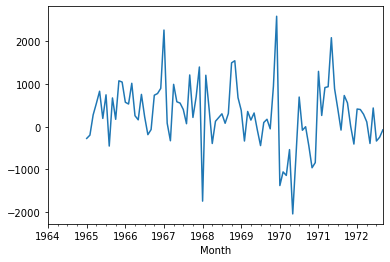

In [38]:
df['Seasonal first diff.'].plot()

In [ ]:
## ARIMA  -  AR + I + MA
##          (p,   d,  q)
## p - PACF graph.
## d - Differencing
## q - ACF graph

In [39]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [40]:
df.head(15)

,Sales,Sales first diff.,Seasonal first diff.
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [41]:
import matplotlib.pyplot as plt

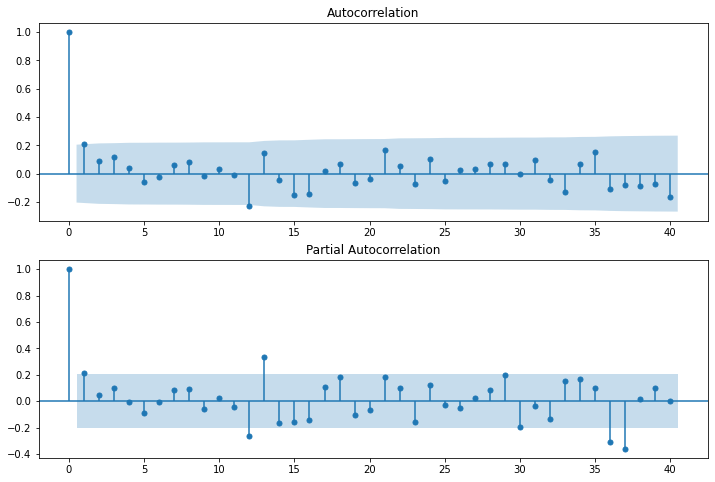

In [43]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal first diff.'].iloc[13:], lags = 40, ax = ax1)


ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal first diff.'].iloc[13:], lags = 40, ax = ax2)

In [44]:
from statsmodels.tsa.arima_model import ARIMA

In [46]:
model = ARIMA(df['Sales'], order = (1,1,1))

C:\Users\44771\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\44771\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [47]:
model = model.fit()

In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Sun, 09 Jul 2023   AIC                           1910.251
Time:                        23:26:56   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7851     12.405      1.837      0.066      -1.529      47.099
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [49]:
df.shape

(105, 3)

In [51]:
df['forecast'] = model.predict(start = 90, end = 103, dynamic = True)

In [54]:
df.tail(20)

,Sales,Sales first diff.,Seasonal first diff.,forecast
Month,,,,
1971-02-01,3162.0,-772.0,263.0,NaN
1971-03-01,4286.0,1124.0,916.0,NaN
1971-04-01,4676.0,390.0,936.0,NaN
1971-05-01,5010.0,334.0,2083.0,NaN
1971-06-01,4874.0,-136.0,888.0,NaN
1971-07-01,4633.0,-241.0,416.0,473.088100
1971-08-01,1659.0,-2974.0,-79.0,218.372134
1971-09-01,5951.0,4292.0,730.0,107.737414
1971-10-01,6981.0,1030.0,557.0,59.683727


<AxesSubplot:xlabel='Month'>

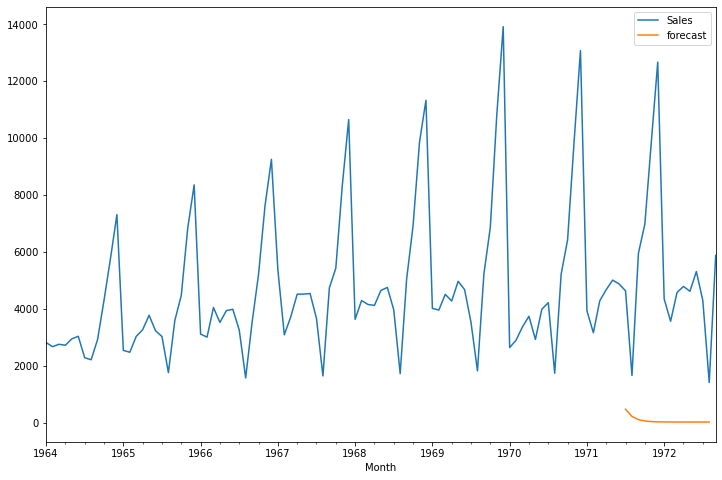

In [55]:
df[['Sales', 'forecast']].plot(figsize = (12,8))

In [ ]:
## Seasonal data -- ARIMA is not suitable. 
## SARIMA - Seasonal ARIMA. 

In [ ]:
## ARIMA - (p. d, q)
## SARIMA - (p, d, q, shift_value)

In [56]:
import statsmodels.api as sm

In [58]:
model = sm.tsa.statespace.SARIMAX(df['Sales'], order = (1,1,1), seasonal_order = (1,1,1,12))

C:\Users\44771\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\44771\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [59]:
results = model.fit()

In [60]:
df['forecast_sarimax'] = results.predict(start = 90, end = 103, dynamic = True)

In [61]:
df.tail(20)

,Sales,Sales first diff.,Seasonal first diff.,forecast,forecast_sarimax
Month,,,,,
1971-02-01,3162.0,-772.0,263.0,NaN,NaN
1971-03-01,4286.0,1124.0,916.0,NaN,NaN
1971-04-01,4676.0,390.0,936.0,NaN,NaN
1971-05-01,5010.0,334.0,2083.0,NaN,NaN
1971-06-01,4874.0,-136.0,888.0,NaN,NaN
1971-07-01,4633.0,-241.0,416.0,473.088100,4437.325182
1971-08-01,1659.0,-2974.0,-79.0,218.372134,2050.747734
1971-09-01,5951.0,4292.0,730.0,107.737414,5493.376656
1971-10-01,6981.0,1030.0,557.0,59.683727,6752.038772


<AxesSubplot:xlabel='Month'>

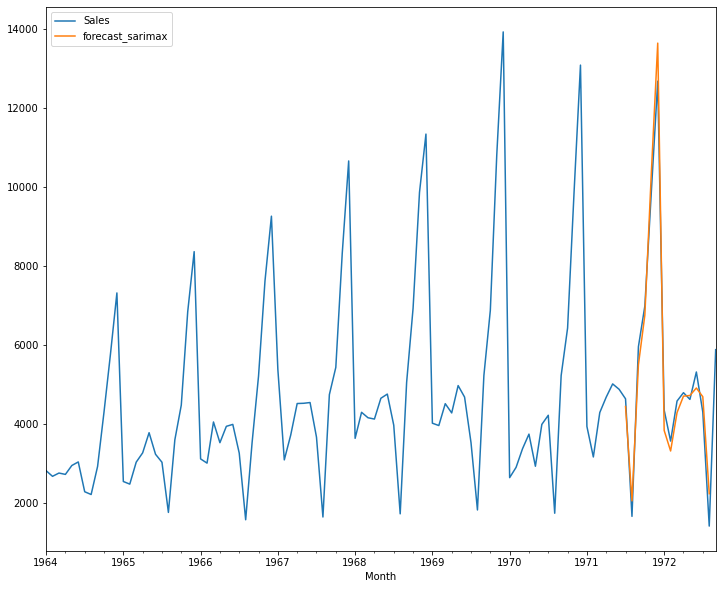

In [63]:
df[['Sales', 'forecast_sarimax']].plot(figsize = (12,10))

In [ ]:
## Whenever we have seasonal data prefer SARIMAX. ARIMA doesn't work on seasonal data. 

# Problem statement. 
### 1. Create additional dataset and check how SARIMAX is working. 

In [ ]:
## dateoffset

In [65]:
from pandas.tseries.offsets import DateOffset
## additional data for 24 months. 

In [66]:
df.index[-1]

Timestamp('1972-09-01 00:00:00')

In [67]:
future_dates = [df.index[-1] + DateOffset(months = x) for x in range(0,24)]

In [70]:
future_dataset = pd.DataFrame(index = future_dates[1:], columns = df.columns)

In [71]:
future_dataset.tail()

,Sales,Sales first diff.,Seasonal first diff.,forecast,forecast_sarimax
1974-04-01,NaN,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN,NaN


In [72]:
future_df = pd.concat([df,future_dataset])

In [73]:
future_df.shape

(128, 5)

In [74]:
future_df['forecast_SARIMAX2'] = results.predict(start = 104, end = 124, dynamic = True)

<AxesSubplot:>

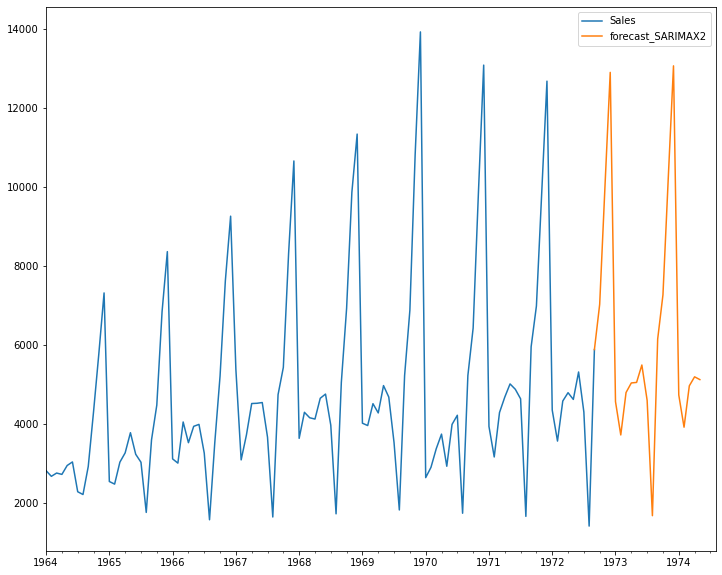

In [75]:
future_df[['Sales', 'forecast_SARIMAX2']].plot(figsize=(12,10))